In [12]:
from utils import *

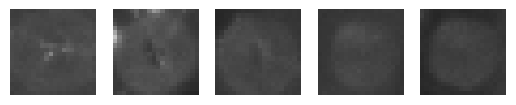

In [13]:
img = cv2.imread('./chamber_images/led1-cam2.bmp')

chamberCoords = np.array([
    [ 5.3031, -2.397,  0.0],
    [ 2.2381, -5.305,  0.0],
    [ 0.0,     0.0,    0.0],
    [-5.3029,  2.2389, 0.0],
    [-2.2382,  5.3024, 0.0],
])

imageCoordsInt = [
    [633, 370],
    [710, 274],
    [776, 421],
    [881, 458],
    [830, 550]
]

imageCoords = np.array(imageCoordsInt, dtype=np.float32)

# Display the fiducial markers just to make sure we got the coords right...
size = 10
fig, ax = plt.subplots(1, len(imageCoordsInt))
for i in range(len(imageCoordsInt)): 
    coord = imageCoordsInt[i]
    coord.reverse() # need to flip for image indexing
    ax[i].imshow(img[coord[0]-size:coord[0]+size, coord[1]-size:coord[1]+size])
    ax[i].axis('off')

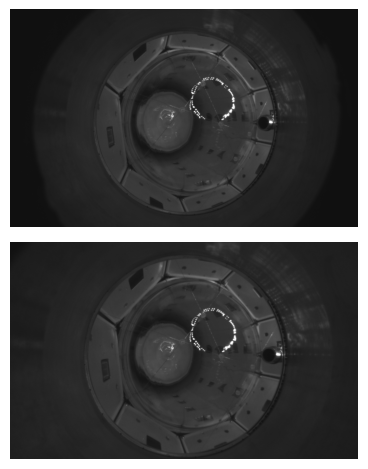

In [14]:
cameraMatrix = np.array([
    [682.59768, 0.0000, 644.12039],
    [0.0000, 682.87589, 402.26979],
    [0.0000, 0.0000, 1.0000]
])

distortionCoefficients = np.array([-0.34914, 0.14577, 0.00081699, -0.00027115, -0.031291])

undistorted = cv2.undistort(img, cameraMatrix, distortionCoefficients)
# undistorted = cv.undistort(img, np.identity(3), None)

fig, ax = plt.subplots(2, 1)
ax[0].imshow(img)
ax[0].axis('off')
ax[1].imshow(undistorted)
ax[1].axis('off')
fig.tight_layout()

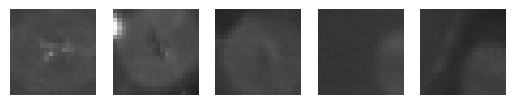

In [18]:
fig, ax = plt.subplots(1, len(imageCoordsInt))
for i in range(len(imageCoordsInt)): 
    coord = imageCoordsInt[i]
    coord.reverse() # need to flip for image indexing
    ax[i].imshow(undistorted[coord[0]-size:coord[0]+size, coord[1]-size:coord[1]+size])
    ax[i].axis('off')

In [ ]:
ret, rvec, tvec = cv2.solvePnP(chamberCoords, imageCoords, cameraMatrix, distortionCoefficients)
print('Translation Vector:\n', tvec, end='\n\n')
print('Rotation Vector:\n', rvec, end='\n\n')

R, _ = cv2.Rodrigues(rvec)
print('Rotation Matrix:\n', R, end='\n\n')

Translation Vector:
 [[ 4.64605075]
 [ 0.70026346]
 [23.73860497]]

Rotation Vector:
 [[0.15668581]
 [2.68051994]
 [0.0955215 ]]

Rotation Matrix:
 [[-0.89189344  0.09483013  0.44219152]
 [ 0.12606499  0.99114451  0.04171536]
 [-0.43431982  0.09295053 -0.89595005]]



In [ ]:
camera_posn = -(R.T)@tvec
true_posn = np.array([12.06, 0.0, 17.88])
print("Calculated Camera Position:\n", camera_posn.flatten(), end='\n\n')
print("True Camera Position:\n",  true_posn, end='\n\n')

print("Difference:", camera_posn.flatten() - true_posn)
print("Difference Magnitude:", np.linalg.norm(camera_posn.flatten() - true_posn))

Calculated Camera Position:
 [14.3656502  -3.34116369 19.18494832]

True Camera Position:
 [12.06  0.   17.88]

Difference: [ 2.3056502  -3.34116369  1.30494832]
Difference Magnitude: 4.264069386395819
